# Twitter Sentiment Analysis

In [1]:
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
import re
sns.set_theme(font_scale=1.4, style='whitegrid')

In [2]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

### Grabbing Twitter Data with Tweepy

In [42]:
consumer_key = "######"
consumer_secret = "######"
access_token = "############"
access_token_secret = "##############"

In [4]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tw.API(auth)

In [5]:
games = ["@NintendoAmerica", "@Xbox", "@PlayStation"]

In [6]:
game_sentiment = []

for game in games:
    game_tweets = api.user_timeline(game, count=200)
    
    for tweet in game_tweets:
        
        game_sentiment.append({
            'User': game,
            'Tweet': tweet.text,
            'Date': tweet.created_at
        })

In [7]:
# Create DataFrame from Tweets
gamedf = pd.DataFrame(game_sentiment)

In [8]:
gamedf.head(10)

,User,Tweet,Date
0,@NintendoAmerica,"Starting today, #DragonQuestXIS: Echoes of an ...",2020-12-07 22:00:02
1,@NintendoAmerica,RT @Ubisoft: Get ready to level up…\n\n#ScottP...,2020-12-07 17:13:33
2,@NintendoAmerica,RT @FortniteGame: Live...and in game! Poison I...,2020-12-05 01:00:17
3,@NintendoAmerica,"Take a deep breath and get stretching, #Fitnes...",2020-12-05 00:01:05
4,@NintendoAmerica,NO PURCH. NEC. Must be US &amp; CAN res age 13...,2020-12-04 23:50:27
5,@NintendoAmerica,The #Splatoon2 North American Open December 20...,2020-12-04 23:50:26
6,@NintendoAmerica,Can you name every K.K. Slider song? Play alon...,2020-12-04 23:01:27
7,@NintendoAmerica,"Grab a warm beverage, put on your favorite swe...",2020-12-04 22:00:02
8,@NintendoAmerica,"Welcome to Nintendo Monthly Rewind, our offici...",2020-12-04 20:14:14
9,@NintendoAmerica,The Super Mario All-Stars Edition #Tetris99 MA...,2020-12-04 19:00:01


In [9]:
gamedf.tail()

,User,Tweet,Date
595,@PlayStation,Is there any better feeling in the world than ...,2020-11-15 20:46:00
596,@PlayStation,Bring us pictures of Spider-Man!\n\nBecome the...,2020-11-15 18:42:01
597,@PlayStation,Feeling is believing. Grass brushes your finge...,2020-11-15 18:05:00
598,@PlayStation,Nacht Der Untoten returns in #BlackOpsColdWar....,2020-11-14 23:24:00
599,@PlayStation,Web-heads and sneakerheads unite! Details on t...,2020-11-14 21:20:02


In [10]:
gamedf.isnull().sum()

User     0
Tweet    0
Date     0
dtype: int64

In [11]:
gamedf.shape

(600, 3)

In [12]:
gamedf['User'].value_counts()

@Xbox               200
@PlayStation        200
@NintendoAmerica    200
Name: User, dtype: int64

In [13]:
gamedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   User    600 non-null    object        
 1   Tweet   600 non-null    object        
 2   Date    600 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 14.2+ KB


### Transforming/Cleaning Tweets 

In [14]:
def pattern_removal(tweet, pattern):
    
    # find the given pattern in a text
    find_patterns = re.findall(pattern, tweet)
    
    # loop through patterns in a tweet and delete it
    for found in find_patterns:
        tweet = re.sub(found, '', tweet)
        
    return tweet

In [15]:
# clean the tweets to allow for greater insights from tweets
def preprocess_tweets(tweets):
    
    # remove RT and handles
    tweets = np.vectorize(pattern_removal)(tweets, 'RT @[\w]+:')
    
    # remove handles
    tweets = np.vectorize(pattern_removal)(tweets, '@[\w]+')
    
    # remove videos and images
    tweets = np.vectorize(pattern_removal)(tweets, '(://|.co/)[a-zA-Z0-9\\./]')
    
    # remove URLs
    tweets = np.vectorize(pattern_removal)(tweets, '(http|https|ftp)://[a-zA-Z0-9\\./]+')
    
    return tweets

In [16]:
gamedf['Tweet'] = preprocess_tweets(gamedf['Tweet'])

In [17]:
gamedf.head()

,User,Tweet,Date
0,@NintendoAmerica,"Starting today, #DragonQuestXIS: Echoes of an ...",2020-12-07 22:00:02
1,@NintendoAmerica,Get ready to level up…\n\n#ScottPilgrimGame l...,2020-12-07 17:13:33
2,@NintendoAmerica,"Live...and in game! Poison Ivy, Midas Rex, an...",2020-12-05 01:00:17
3,@NintendoAmerica,"Take a deep breath and get stretching, #Fitnes...",2020-12-05 00:01:05
4,@NintendoAmerica,NO PURCH. NEC. Must be US &amp; CAN res age 13...,2020-12-04 23:50:27


### Sentiment Analysis of Tweets

In [18]:
sentiments = gamedf['Tweet'].apply(lambda x: sid.polarity_scores(x))

In [19]:
sentiments[:5]

0    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
1    {'neg': 0.0, 'neu': 0.763, 'pos': 0.237, 'comp...
2    {'neg': 0.127, 'neu': 0.652, 'pos': 0.222, 'co...
3    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
4    {'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'comp...
Name: Tweet, dtype: object

In [20]:
sent_list = ['neg', 'neu', 'pos', 'compound']

for sent in sent_list:
    gamedf[sent] = sentiments.apply(lambda x: x[sent])

In [21]:
def comp_scores(x):
    if x >= 0.05: return 'POSITIVE'
    elif x <= -0.05: return 'NEGATIVE'
    return 'NEUTRAL'

In [22]:
# Create new features of tweet sentiments
gamedf['comp_score'] = gamedf['compound'].apply(comp_scores)

In [23]:
gamedf.head()

,User,Tweet,Date,neg,neu,pos,compound,comp_score
0,@NintendoAmerica,"Starting today, #DragonQuestXIS: Echoes of an ...",2020-12-07 22:00:02,0.000,1.000,0.000,0.0000,NEUTRAL
1,@NintendoAmerica,Get ready to level up…\n\n#ScottPilgrimGame l...,2020-12-07 17:13:33,0.000,0.763,0.237,0.4199,POSITIVE
2,@NintendoAmerica,"Live...and in game! Poison Ivy, Midas Rex, an...",2020-12-05 01:00:17,0.127,0.652,0.222,0.3869,POSITIVE
3,@NintendoAmerica,"Take a deep breath and get stretching, #Fitnes...",2020-12-05 00:01:05,0.000,1.000,0.000,0.0000,NEUTRAL
4,@NintendoAmerica,NO PURCH. NEC. Must be US &amp; CAN res age 13...,2020-12-04 23:50:27,0.109,0.891,0.000,-0.4466,NEGATIVE


In [24]:
gamedf.to_csv('studio_update.csv', index=False)

In [25]:
gamedf = pd.read_csv('studio_update.csv', parse_dates=['Date'])

In [26]:
gamedf.sort_values(by='Date', inplace=True)

In [27]:
# Create new feature based on month and day
gamedf['MM-DD'] = gamedf['Date'].dt.strftime('%m-%d')

In [28]:
gamedf.head()

,User,Tweet,Date,neg,neu,pos,compound,comp_score,MM-DD
199,@NintendoAmerica,Happy #Halloween! Wishing you a frightfully fu...,2020-10-31 15:00:08,0.167,0.247,0.586,0.7772,POSITIVE,10-31
198,@NintendoAmerica,Ruined King: A League of Legends Story from a...,2020-10-31 16:01:09,0.193,0.807,0.000,-0.4767,NEGATIVE,10-31
197,@NintendoAmerica,Who's walking up to their island residents wit...,2020-10-31 19:00:12,0.000,0.835,0.165,0.3346,POSITIVE,10-31
196,@NintendoAmerica,Reminder at 5 PM to Midnight #ACNHHalloween ht...,2020-10-31 21:00:00,0.000,1.000,0.000,0.0000,NEUTRAL,10-31
195,@NintendoAmerica,JOBSKI APPRECIATION – A Thread\n\n#PartTimeUFO...,2020-11-01 16:49:20,0.000,0.498,0.502,0.6166,POSITIVE,11-01


### Console's twitter account timeline - Sentiment Analysis

#### Average Sentiment per Console

In [29]:
# Examine Average Sentiments for each console
gamedf.groupby('User')['compound'].mean()

User
@NintendoAmerica    0.223286
@PlayStation        0.166502
@Xbox               0.282096
Name: compound, dtype: float64

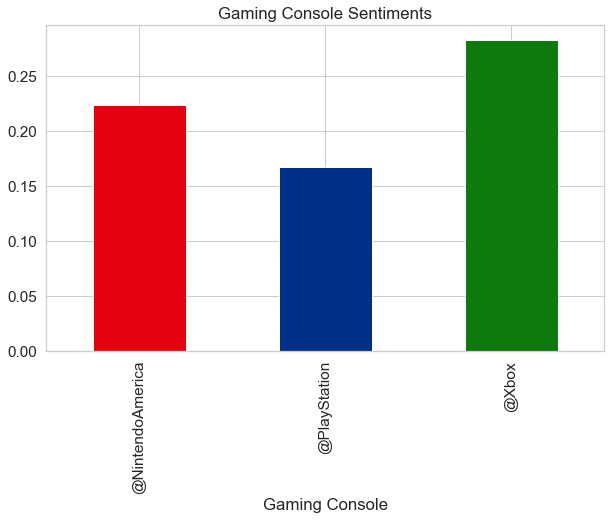

In [30]:
plt.figure(figsize=(10,6))
gamedf.groupby('User')['compound'].mean().plot(kind='bar', color=['#e4000f','#003087','#0e7a0d'])
plt.title('Gaming Console Sentiments')
plt.xlabel('Gaming Console')
plt.show()

#### Console's twitter account - tweeted sentiment counts

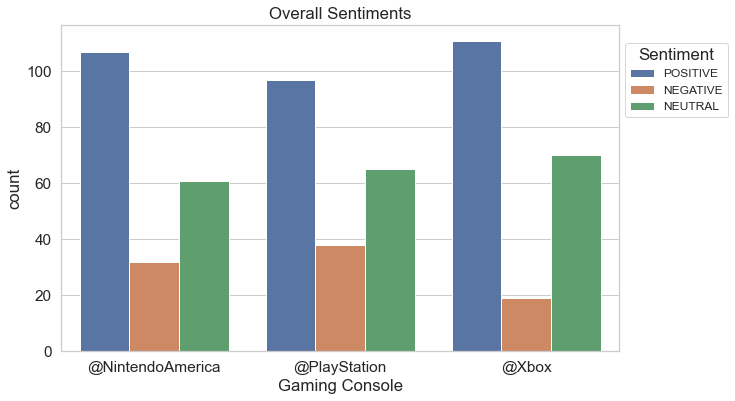

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x=gamedf['User'], hue=gamedf['comp_score'])
plt.legend(title="Sentiment", bbox_to_anchor=(1,0.7), loc="lower left", prop={'size':12})
plt.title('Overall Sentiments')
plt.xlabel('Gaming Console')
plt.show()

#### Console's twitter account - sentiment frequency

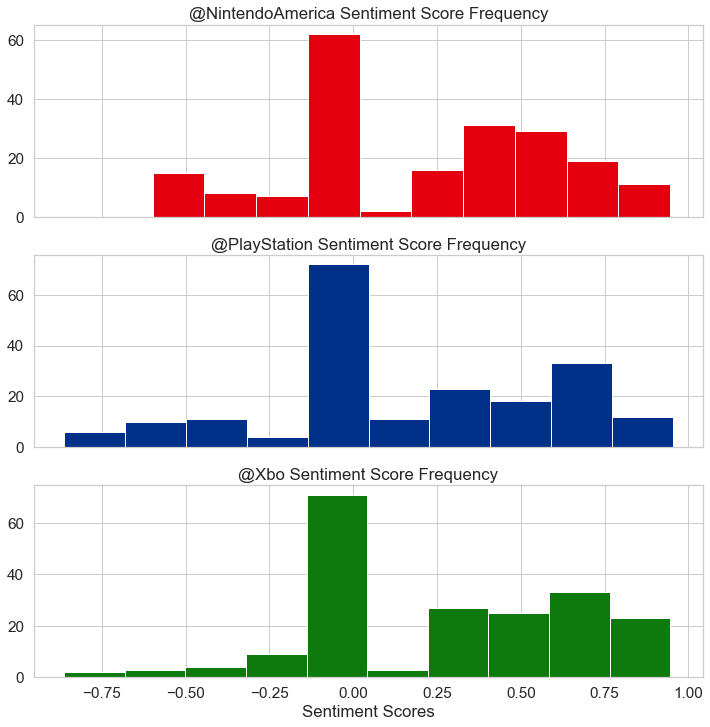

In [32]:
fig, ax = plt.subplots(nrows=3, figsize=(12,12), sharex='col')
ax[0].hist(gamedf[gamedf['User'] == '@NintendoAmerica']['compound'], color='#e4000f')
ax[1].hist(gamedf[gamedf['User'] == '@PlayStation']['compound'], color='#003087')
ax[2].hist(gamedf[gamedf['User'] == '@Xbox']['compound'], color='#0e7a0d')

ax[0].set_title('@NintendoAmerica Sentiment Score Frequency')
ax[1].set_title('@PlayStation Sentiment Score Frequency')
ax[2].set_title('@Xbo Sentiment Score Frequency')
ax[2].set_xlabel('Sentiment Scores')
plt.show()

#### Console's account - sentiments per day

In [33]:
gamedf['Date'].max()

Timestamp('2020-12-08 02:00:01')

In [34]:
gamedf['Date'].min()

Timestamp('2020-10-31 15:00:08')

In [35]:
gamedf[gamedf['User'] == '@Xbox']['Date'].min()

Timestamp('2020-11-30 18:20:26')

In [36]:
gamedf[gamedf['User'] == '@PlayStation']['Date'].min()

Timestamp('2020-11-14 21:20:02')

In [37]:
gamedf[gamedf['User'] == '@NintendoAmerica']['Date'].min()

Timestamp('2020-10-31 15:00:08')

In [38]:
newdf = gamedf[gamedf['MM-DD'] >= '11-14']

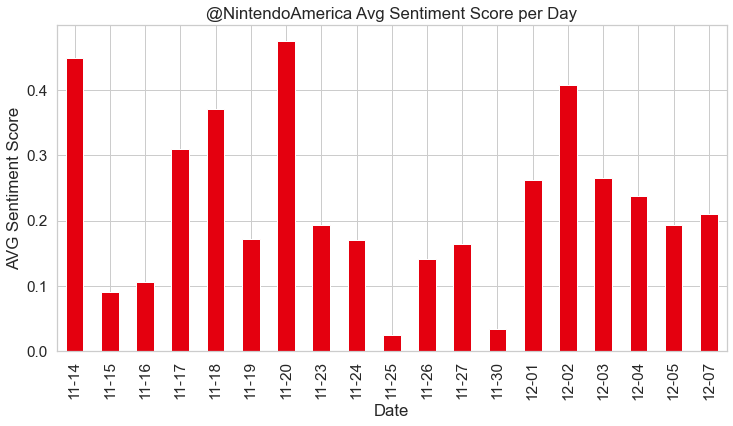

In [39]:
plt.figure(figsize=(12,6))
newdf[newdf['User'] == '@NintendoAmerica'].groupby('MM-DD')['compound'].mean().plot(kind='bar',color='#e4000f')
plt.title('@NintendoAmerica Avg Sentiment Score per Day')
plt.xlabel('Date')
plt.ylabel('AVG Sentiment Score')
plt.show()

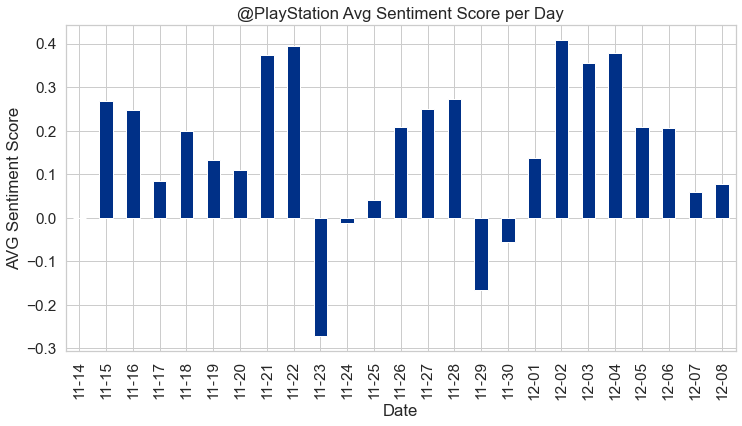

In [40]:
plt.figure(figsize=(12,6))
gamedf[gamedf['User'] == '@PlayStation'].groupby('MM-DD')['compound'].mean().plot(kind='bar',color='#003087')
plt.title('@PlayStation Avg Sentiment Score per Day')
plt.xlabel('Date')
plt.ylabel('AVG Sentiment Score')
plt.show()

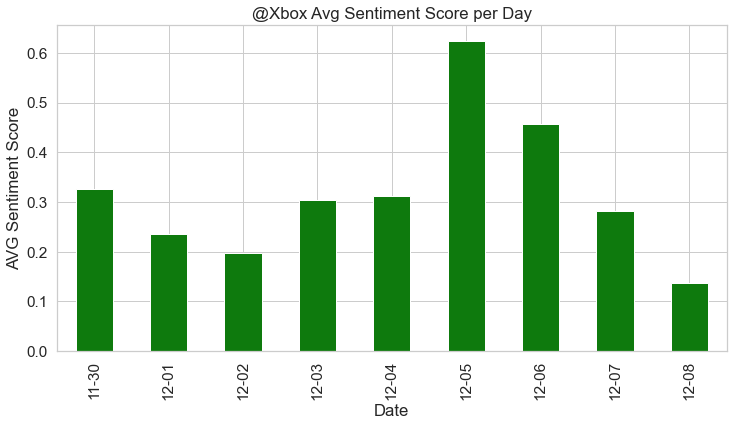

In [41]:
plt.figure(figsize=(12,6))
gamedf[gamedf['User'] == '@Xbox'].groupby('MM-DD')['compound'].mean().plot(kind='bar',color='#0e7a0d')
plt.title('@Xbox Avg Sentiment Score per Day')
plt.xlabel('Date')
plt.ylabel('AVG Sentiment Score')
plt.show()